# Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

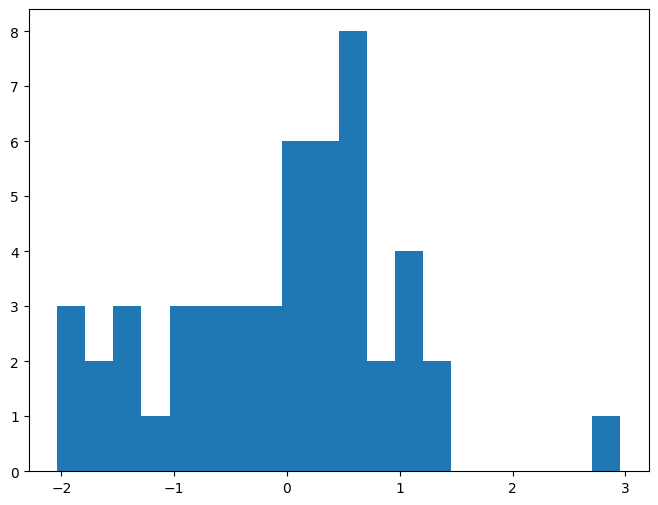

In [2]:
data = np.random.normal(size=(1, 50))

plt.figure(figsize=(8, 6))
plt.hist(data.flatten(), bins=20)
plt.show()

# Confidence Intervals

Source:
- <a href="https://www.westga.edu/academics/research/vrc/assets/docs/confidence_intervals_notes.pdf">University of West Georgia</a>

$$
CI = \bar{x} \pm z \frac{\sigma}{\sqrt{n}}
$$

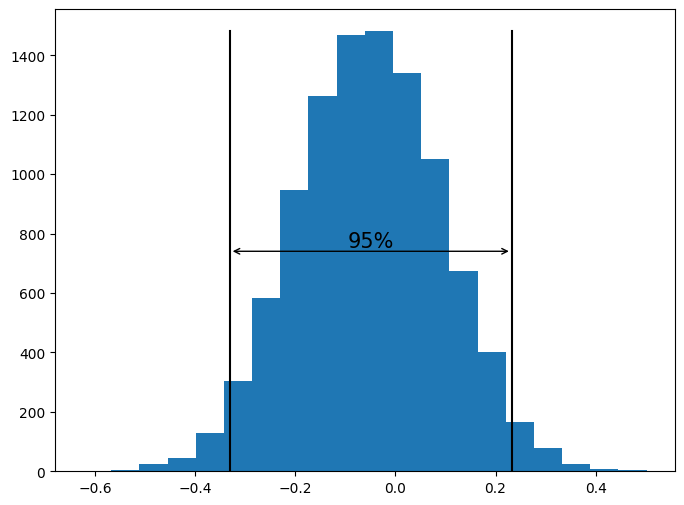

In [75]:
from scipy.stats import bootstrap

bts = bootstrap(data, np.mean, confidence_level=0.95, n_resamples=10000)

plt.figure(figsize=(8, 6))
y, x, _ = plt.hist(bts.bootstrap_distribution, bins=20)
plt.plot([bts.confidence_interval.low]*2, [0, y.max()], color="black")
plt.plot([bts.confidence_interval.high]*2, [0, y.max()], color="black")
plt.annotate(
    text='',
    xytext=(bts.confidence_interval.low, y.max()/2),
    xy=(bts.confidence_interval.high, y.max()/2),
    arrowprops=dict(arrowstyle='<->')
)
plt.text(
    np.mean([bts.confidence_interval.low, bts.confidence_interval.high]),
    y.max()/2,
    "95%",
    horizontalalignment = "center",
    verticalalignment = "bottom",
    fontsize=15
)
plt.show()

# Confidence Intervals in regression

Sources:
- <a href="https://towardsdatascience.com/generating-confidence-intervals-for-regression-models-2dd60026fbce">Tiago Toledo Jr. - Generating Confidence Intervals for Regression Models</a>

### The Naive Method

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

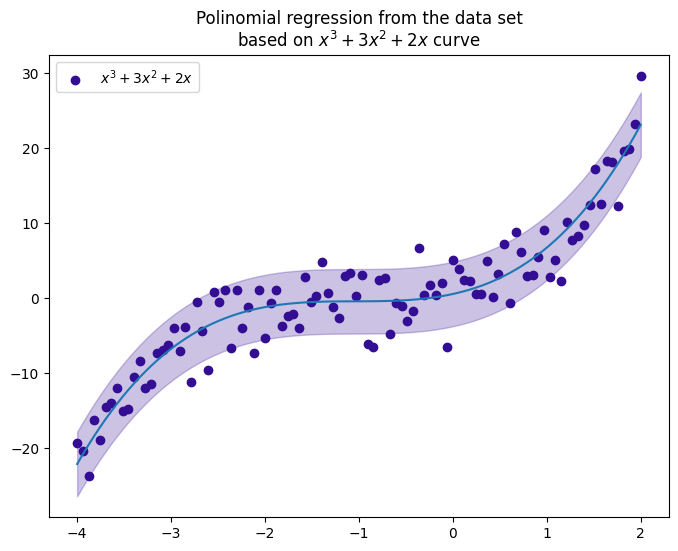

In [58]:
curve = lambda x: x**3 + 3*x**2 + 2*x + np.random.normal(size=len(x), scale=3)

x = np.linspace(-4, 2, 100)
y = curve(x)

poly = PolynomialFeatures(degree=3).fit(x.reshape((-1, 1)))
x_poly = poly.transform(x.reshape((-1, 1)))

linReg = LinearRegression()
linReg.fit(x_poly, y)

y_pred = linReg.predict(poly.transform(np.linspace(x.min(), x.max(), 100).reshape((-1, 1))))

alpha = 0.05
residuals = y - y_pred
ci = np.quantile(residuals, 1 - alpha)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="#330d94", label="$x^3 + 3x^2 +2x$")
plt.fill_between(x, y_pred-ci, y_pred+ci, alpha=0.25, color="#330d94")
plt.plot(x, y_pred)
plt.title("Polinomial regression from the data set\nbased on $x^3 + 3x^2 +2x$ curve")
plt.legend()
plt.show()